After living in the Bay Area for almost a year, I've seen far too many claims about houses and businesses being in the "heart" of Silicon Valley. I want to get to the bottom of this—where is Silicon Valley's geographical heart, anyway?

In [1]:
import requests
from bs4 import BeautifulSoup

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
listings_url = "http://sfbay.craigslist.org/search/hhh?query=%22heart%20of%20silicon%20valley%22&s={offset}&sale_date=-&sort=rel&format=rss"

def get_listing_urls():
    listings = []
    offset = 0
    stop = False
    
    while not stop:
        req = requests.get(listings_url.format(offset=offset))
        listings_doc = BeautifulSoup(req.text, "lxml")
        listing_els = listings_doc.findAll('item')
        
        if listing_els:
            listings += [el.find('dc:source').text for el in listing_els]
            offset += len(listing_els)
        else:
            stop = True
        
    return listings

In [3]:
def get_listing_location(url):
    doc = BeautifulSoup(requests.get(url).text, "lxml")
    location_el = doc.find('div', attrs={'id': 'map'})
    if location_el:
        return (float(location_el.attrs['data-latitude']),
                float(location_el.attrs['data-longitude']))

In [4]:
import time

def get_listing_locations(listing_urls):
    for listing_url in listing_urls:
        location = get_listing_location(listing_url)
        if location:
            yield location
            
        # Be nice to the Craigslist servers
        time.sleep(0.1)

In [5]:
locations = list(get_listing_locations(get_listing_urls()))

In [6]:
(locations[:10], len(locations))

([(37.29413, -121.843185),
  (37.405888, -121.978033),
  (37.36444, -121.916967),
  (37.3492, -121.953),
  (37.405888, -121.978033),
  (37.405888, -121.978033),
  (37.322187, -121.986351),
  (37.457789, -122.141845),
  (37.343936, -121.960231),
  (37.318, -122.0449)],
 472)

(array([  15.,   20.,   73.,  120.,  174.,   50.,    8.,    6.,    3.,    3.]),
 array([ 37.221601 ,  37.2588901,  37.2961792,  37.3334683,  37.3707574,
         37.4080465,  37.4453356,  37.4826247,  37.5199138,  37.5572029,
         37.594492 ]),
 <a list of 10 Patch objects>)

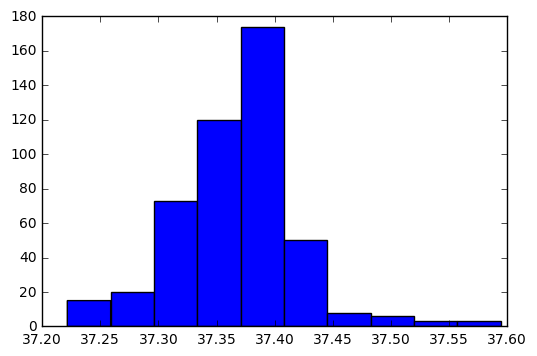

In [7]:
plt.hist([loc[0] for loc in locations])

(array([   1.,    7.,    4.,    3.,   23.,   60.,  190.,  138.,   32.,   14.]),
 array([-122.403016 , -122.3430306, -122.2830452, -122.2230598,
        -122.1630744, -122.103089 , -122.0431036, -121.9831182,
        -121.9231328, -121.8631474, -121.803162 ]),
 <a list of 10 Patch objects>)

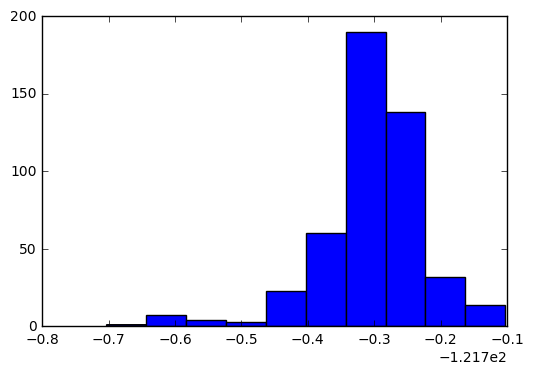

In [8]:
plt.hist([loc[1] for loc in locations])

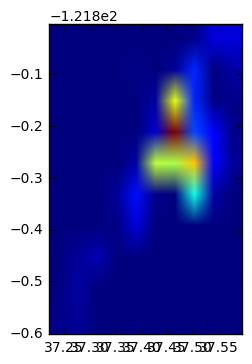

In [9]:
heatmap, xedges, yedges = np.histogram2d([loc[0] for loc in locations], [loc[1] for loc in locations])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap, extent=extent)

In [10]:
avg = np.mean(locations, axis=0)
print(avg)

[  37.369968   -122.00486985]


In [11]:
from IPython.display import IFrame
from IPython.core.display import display
        
map_url = "http://maps.google.com/maps?q=loc:{lat},{lon}&z=17"
print(map_url.format(lat=avg[0], lon=avg[1]))

http://maps.google.com/maps?q=loc:37.36996800423728,-122.00486984745781&z=17
